# EP3.1 – Segmentação

MAC0417/5768 - Visão e Processamento de Imagens

### Gabriel Bazo
### NUSP: 10277231

## Introdução 
O objetivo desta primeira parte do exercício programa é a segmentação dos objetos de interesse. Este processo consiste em segmentar o objeto do fundo, resultando uma imagem binária: 0 para o fundo e 1 para o objeto. Duas formas de segmentação serão usados: manual, para geração do *ground-truth*, e automática usando o algoritmo de *threshold*.

### Segmentação manual

Esta etapa foi realizada seguindo o exemplo que o professor utilizou em aula, com a imagem em escala de cinza, o objeto de interesse foi destacado com uma cor de alto contraste, após isso a função *threshold* foi aplicada e o nível de preto foi ajustado com base no histograma da imagem, afim de se obter a melhor diferença entre o fundo e o objeto de interesse, todo o processo foi realizado no Gimp v2.10 

### Segmentação automatica

A etapa automatica foi realizada com uso do código a seguir.

No final exemplos de ambos pipelines serão exibidos.

## Preparação do ambiente de programação
### Importando as bibliotecas necessárias para a implementação dos algoritmos

In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import glob
from skimage import data
from skimage.io import imread, imshow, imsave
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

Definição do destino das imagens

In [2]:
proc = "/home/gabriel/Documentos/EP CV/4 - auto/"

Criação de uma variável com o caminho de todas as imagens que serão processadas, a base com 15% das imagens que passaram por processamento manual foram separadas em dieretórios diferente das imagens destinadas ao processamento automático

In [3]:
images = glob.glob("/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/**/*.jpg")

In [6]:
images[0:5]

['/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim73.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim37.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim22.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim41.jpg',
 '/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/3 - X_CAFE/lim3.jpg']

### Código para processamento das imagens

Seu funcionamento é simples e todas as etapas estão integradas no mesmo. Em um *for* que percorre todas as imagens que estão distibuídas em dez pastas (cada uma referente a uma classe), as seguintes etapas são executadas na sequencia:
- Leitura da imagem
- Aplicação do *threshold* por meio de um método binário combinado com o método OTSU
- Exportação dessa imagem 
- Delimitação da feret box e aplicação na imagem por sobreposição
- Criação e exportação de uma nova imagem baseada nas dimensões da feret box
- Exportação da imagem completa com *threshold* e feret box 

Quando executado com sucesso 3 novas imagens serão geradas a partir da imagem de entrada.

In [ ]:
for i in range(0, len(images)):
    img = cv2.imread(images[i],0)

    ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    cv2.imwrite(os.path.join(proc, 'lim'+str(i)+'.jpg'), thresh1)

    fig, ax = plt.subplots(figsize=(15, 10))
    plt.imshow(thresh1, 'gray')

    for region in regionprops(thresh1):
        # take regions with large enough areas
        if region.area >= 100:
            # draw rectangle around segmented
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    roi = img[minr:maxr, minc:maxc]
    cv2.imwrite(os.path.join(proc, 'roi'+str(i)+'.jpg'), roi)

    ax.set_axis_off()
    plt.tight_layout()
    plt.savefig(os.path.join(proc, str(i)+'.jpg'), bbox_inches='tight',pad_inches=0)
    #plt.show()

## Resultados

### Processamento Manual

Ressaltando que ate a etapa do *threshold* foi realizado no Gimp e o Ferret Box foi processado automaticamente com base no mesmo código exibido anteriormente

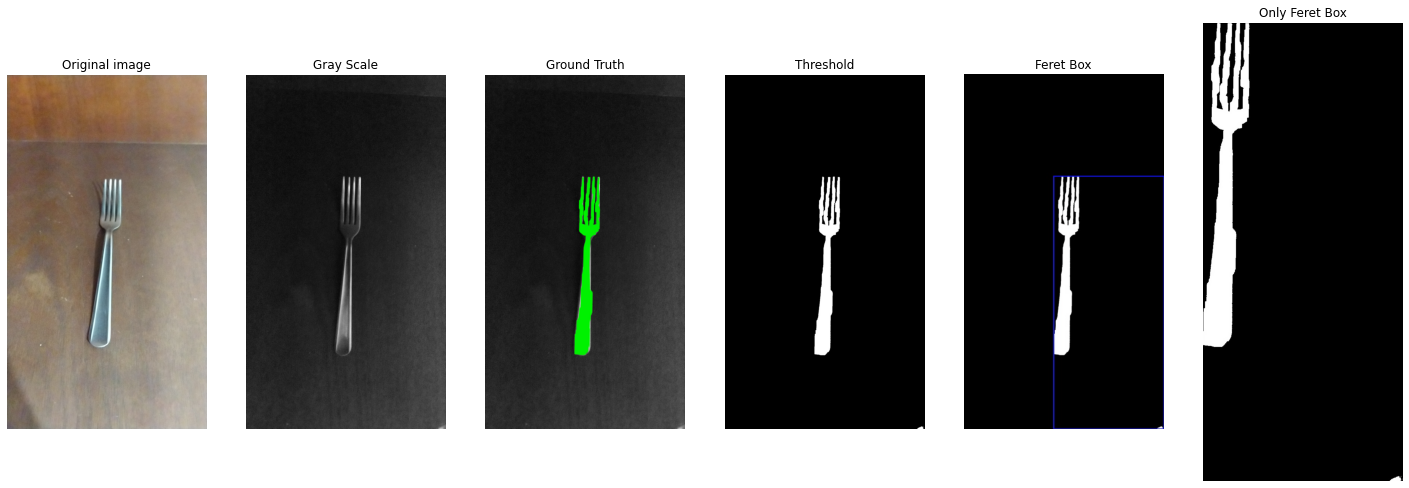

In [27]:
# Criação de um gráfico com a sequencia de uma mesma imagem a fim de representar o pipeline esperado

original = cv2.imread('/home/gabriel/Documentos/EP CV/1 - imagens originais/5 - garfo/525.jpg')
gray = cv2.imread('/home/gabriel/Documentos/EP CV/2 - gray images/5 - GARFO/444_gray.jpg')
ground = cv2.imread('/home/gabriel/Documentos/EP CV/3 - manual/3 - ground truth/5 - GARFO/444_gray.jpg')
thresh = cv2.imread('/home/gabriel/Documentos/EP CV/3 - manual/4 - imagem binaria limiarização/5 - GARFO/444_gray.jpg')
feret1 = cv2.imread('/home/gabriel/Documentos/EP CV/3 - manual/5 - imagem com feret box/5 - GARFO/65.jpg')
feret2 = cv2.imread('/home/gabriel/Documentos/EP CV/3 - manual/6 - feret box/5 - GARFO/roi65.jpg')

fig, axes = plt.subplots(ncols=6, figsize=(25, 15))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original image')

ax[1].imshow(gray)
ax[1].set_title('Gray Scale')

ax[2].imshow(ground)
ax[2].set_title('Ground Truth')

ax[3].imshow(thresh)
ax[3].set_title('Threshold')

ax[4].imshow(feret1)
ax[4].set_title('Feret Box')

ax[5].imshow(feret2)
ax[5].set_title('Only Feret Box')

for a in ax:
    a.axis('off')

plt.show()

### Processamento Automático

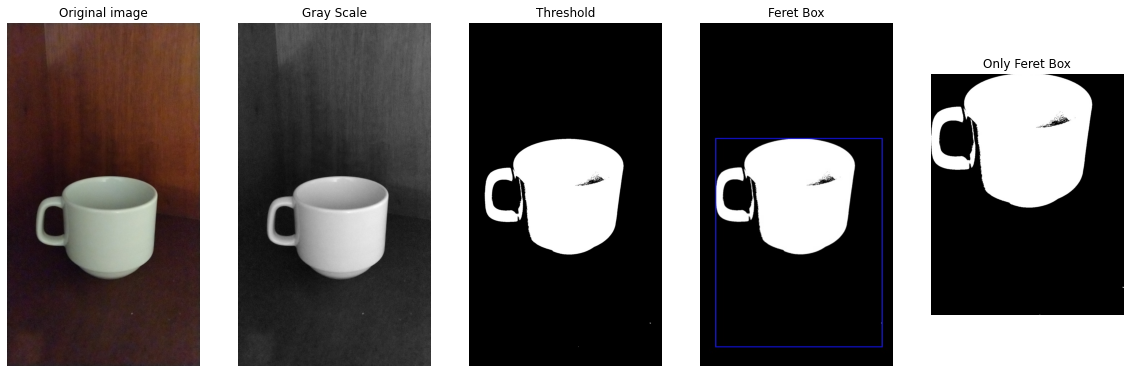

In [32]:
original = cv2.imread('/home/gabriel/Documentos/EP CV/1 - imagens originais/1 - xicara_cha/131.jpg')
gray = cv2.imread('/home/gabriel/Documentos/EP CV/2 - gray images/1 - X_CHA/41_gray.jpg')
thresh = cv2.imread('/home/gabriel/Documentos/EP CV/4 - auto/4 - imagem binaria limiarização/1 - X_CHA/lim104.jpg')
feret1 = cv2.imread('/home/gabriel/Documentos/EP CV/4 - auto/5 - imagem com feret box/1 - X_CHA/101.jpg')
feret2 = cv2.imread('/home/gabriel/Documentos/EP CV/4 - auto/6 - feret box/1 - X_CHA/roi101.jpg')

fig, axes = plt.subplots(ncols=5, figsize=(20, 10))
ax = axes.ravel()

ax[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original image')

ax[1].imshow(gray)
ax[1].set_title('Gray Scale')

ax[2].imshow(thresh)
ax[2].set_title('Threshold')

ax[3].imshow(feret1)
ax[3].set_title('Feret Box')

ax[4].imshow(feret2)
ax[4].set_title('Only Feret Box')

for a in ax:
    a.axis('off')

plt.show()

### Conclusões

De maneira geral, o resultado do *threshold* foi satisfatório, as imagens que receberam o processamento manual apresentaram um resultado superior quando comparado ao método automático, já o método para criação da Feret Box também performou melhor nas imagens processadas manualmente, nas imagens automáticas em alguns casos ele não foi capaz de delimitar o objeto de interesse e selecionou a imagem completa. Esses dois exemplos exibidos obtiveram um resultado bom e semelhante, todas as outras imagens da base processadas estão disponiveis no Drive do EP. [Link para o Drive](https://drive.google.com/drive/folders/1gIPJ6pSHb_MJU87CrQYfPtb70KO8Erkf?usp=sharing)